In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [2]:
df=pd.read_csv(r"C:\Users\santo\OneDrive\Desktop\Velocity\CSV Files\churn - churn.csv")

In [3]:
df.sample(5)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
2442,No,82,no,yes,34,232.6,121,39.54,153.2,115,13.02,286.7,77,12.90,4.7,3,1.27,3
872,No,149,no,yes,43,206.7,79,35.14,174.6,122,14.84,241.5,80,10.87,10.9,3,2.94,1
2279,No,80,no,no,0,113.2,86,19.24,185.5,97,15.77,237.3,145,10.68,9.5,5,2.57,1
208,No,106,no,no,0,213.9,95,36.36,151.9,70,12.91,260.1,124,11.70,12.2,5,3.29,3
2970,No,90,no,yes,22,124.5,94,21.17,231.7,90,19.69,222.2,108,10.00,6.4,12,1.73,1


In [4]:
df["churn"]=df["churn"].map({"No":0,"Yes":1})
df["internationalplan"]=df["internationalplan"].map({"no":0,"yes":1})
df["voicemailplan"]=df["voicemailplan"].map({"no":0,"yes":1})

In [5]:
df.sample(5)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
1874,0,67,0,0,0,152.5,131,25.93,252.4,107,21.45,185.4,104,8.34,4.9,3,1.32,2
477,0,141,0,1,23,149.7,112,25.45,162.5,118,13.81,220.3,115,9.91,7.6,2,2.05,3
3429,0,103,0,0,0,147.3,81,25.04,158.4,88,13.46,193.8,103,8.72,11.0,3,2.97,2
4925,0,109,0,0,0,136.2,103,23.15,177.8,132,15.11,263.4,135,11.85,8.3,3,2.24,1
111,0,103,0,0,0,185.0,117,31.45,223.3,94,18.98,222.8,91,10.03,12.6,2,3.40,2


# Exploratory data analysis

In [6]:
df.shape

(5000, 18)

In [7]:
df.columns

Index(['churn', 'accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
       'totalnightminutes', 'totalnightcalls', 'totalnightcharge',
       'totalintlminutes', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')

In [8]:
#check for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   int64  
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   int64  
 3   voicemailplan               5000 non-null   int64  
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [9]:
df.isnull().sum()

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.141400,100.25860,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,0.348469,39.69456,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,73.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,100.00000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,0.000000,127.00000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,1.000000,243.00000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
df["churn"].value_counts()

0    4293
1     707
Name: churn, dtype: int64

#### detecting outlier

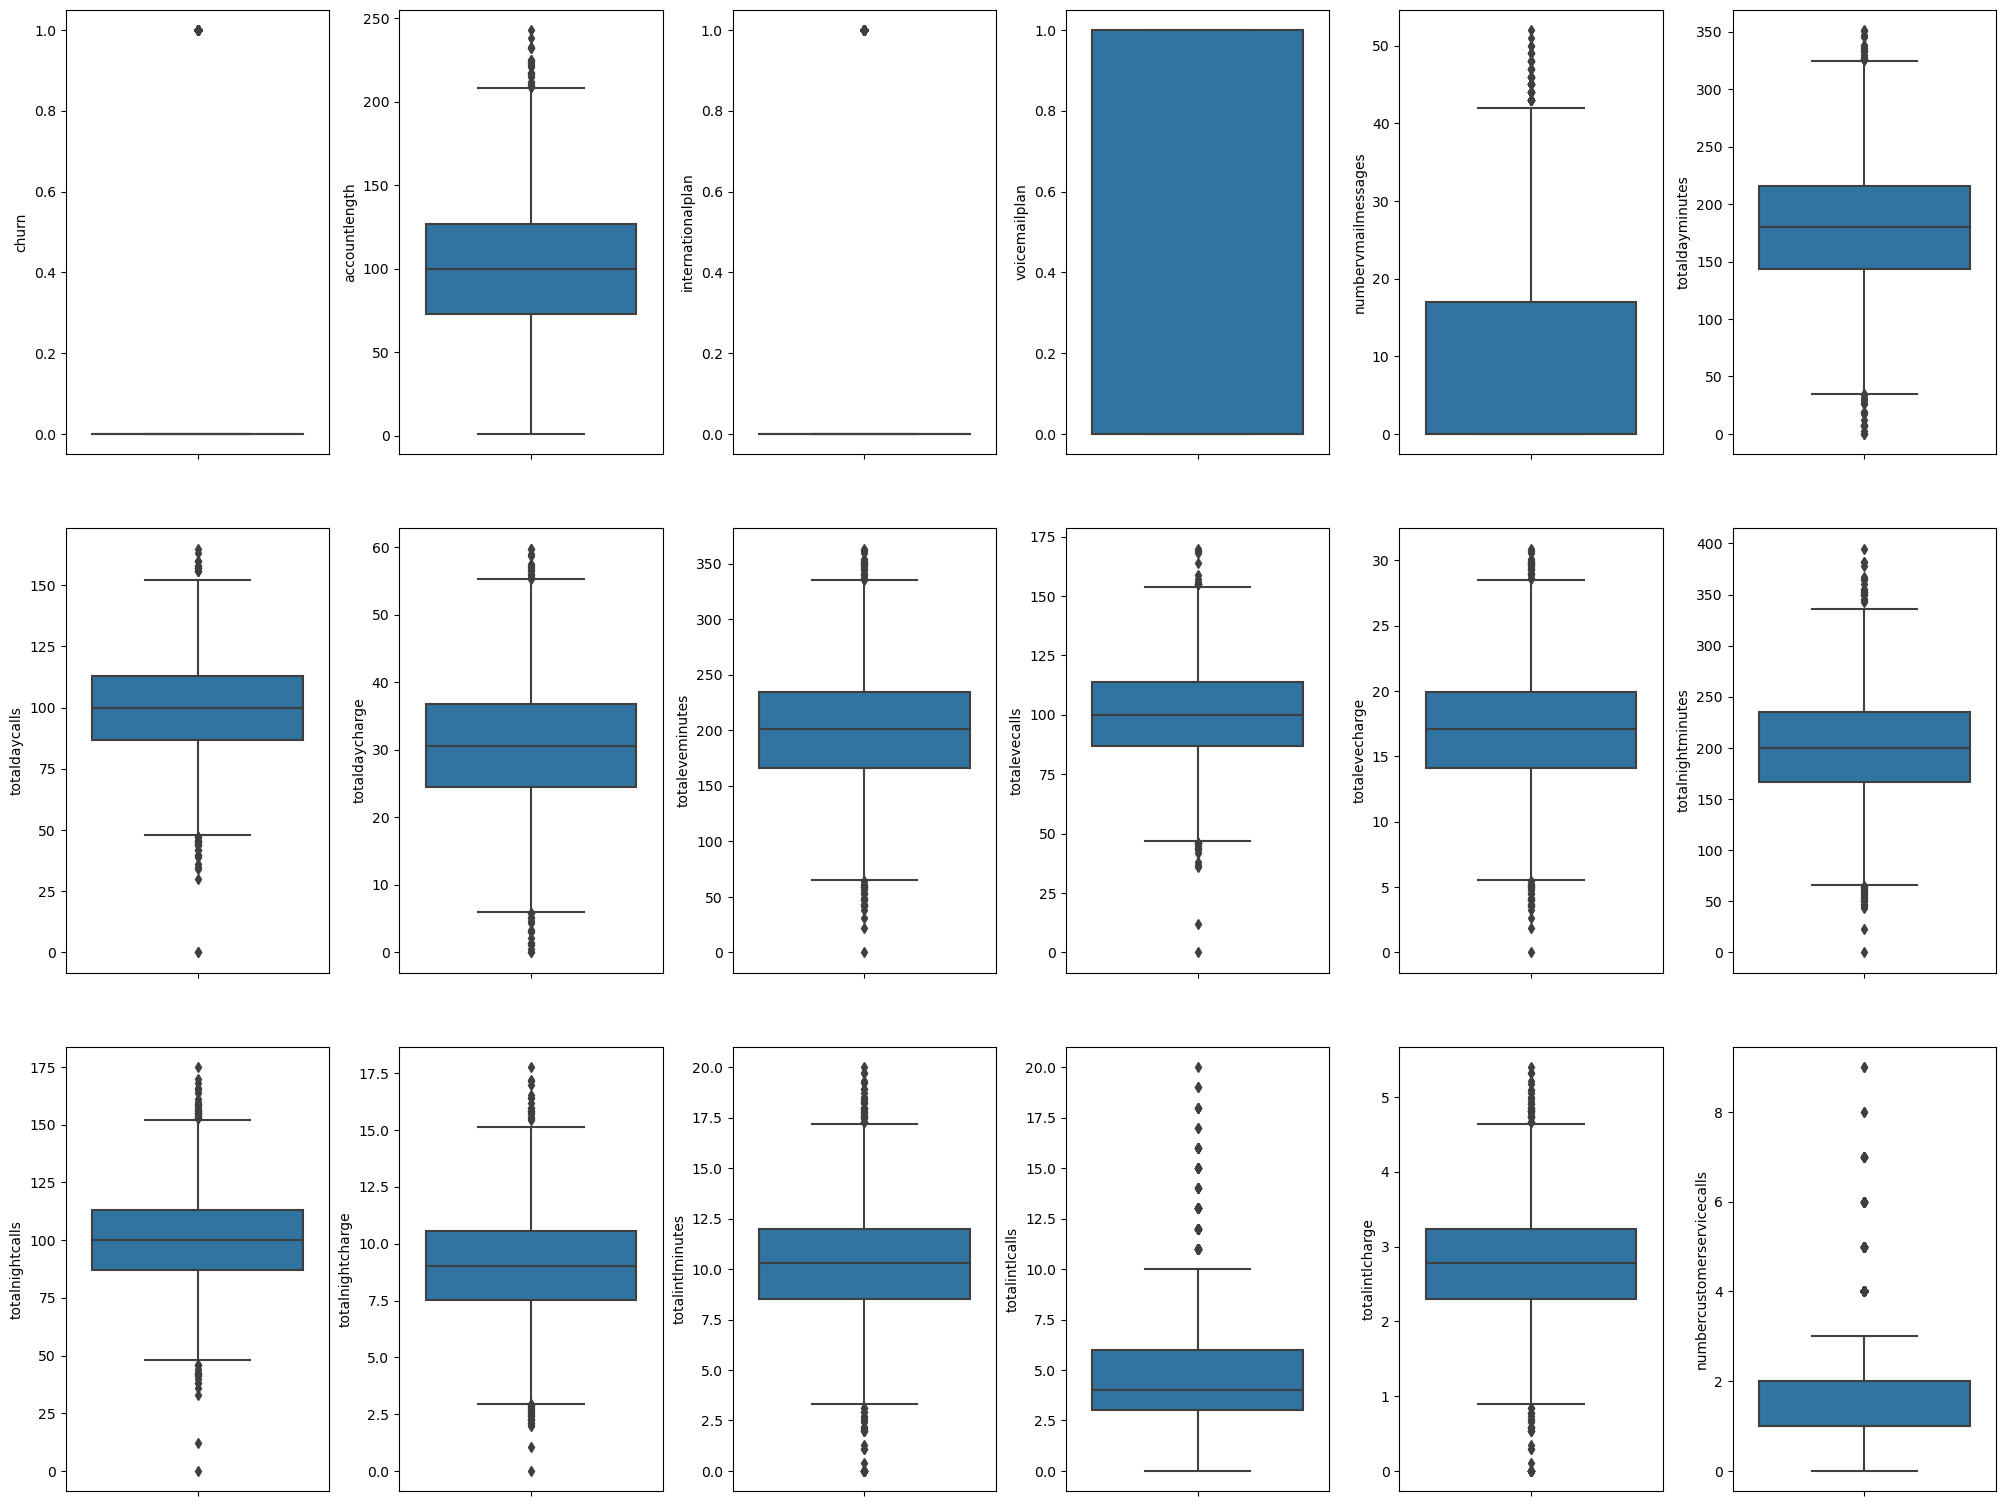

In [13]:
# create box plot
fig, ax = plt.subplots(ncols=6,nrows=3,figsize=(20,15))
index=0
ax=ax.flatten()

for i,j in df.items():
    sns.boxplot(y=i,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [14]:
lower_bound=df["accountlength"].mean()- 3*(df["accountlength"].std())
Upper_bound=df["accountlength"].mean()+ 3*(df["accountlength"].std())
df=df[(df["accountlength"]<Upper_bound) & (df["accountlength"]>lower_bound)]
lower_bound=df["numbervmailmessages"].mean()- 3*(df["numbervmailmessages"].std())
Upper_bound=df["numbervmailmessages"].mean()+ 3*(df["numbervmailmessages"].std())
df=df[(df["numbervmailmessages"]<Upper_bound) & (df["numbervmailmessages"]>lower_bound)]
lower_bound=df["totaldayminutes"].mean()- 3*(df["totaldayminutes"].std())
Upper_bound=df["totaldayminutes"].mean()+ 3*(df["totaldayminutes"].std())
df=df[(df["totaldayminutes"]<Upper_bound) & (df["totaldayminutes"]>lower_bound)]
lower_bound=df["totaldaycalls"].mean()- 3*(df["totaldaycalls"].std())
Upper_bound=df["totaldaycalls"].mean()+ 3*(df["totaldaycalls"].std())
df=df[(df["totaldaycalls"]<Upper_bound) & (df["totaldaycalls"]>lower_bound)]
lower_bound=df["totaldaycharge"].mean()- 3*(df["totaldaycharge"].std())
Upper_bound=df["totaldaycharge"].mean()+ 3*(df["totaldaycharge"].std())
df=df[(df["totaldaycharge"]<Upper_bound) & (df["totaldaycharge"]>lower_bound)]
lower_bound=df["totaleveminutes"].mean()- 3*(df["totaleveminutes"].std())
Upper_bound=df["totaleveminutes"].mean()+ 3*(df["totaleveminutes"].std())
df=df[(df["totaleveminutes"]<Upper_bound) & (df["totaleveminutes"]>lower_bound)]
lower_bound=df["totalevecalls"].mean()- 3*(df["totalevecalls"].std())
Upper_bound=df["totalevecalls"].mean()+ 3*(df["totalevecalls"].std())
df=df[(df["totalevecalls"]<Upper_bound) & (df["totalevecalls"]>lower_bound)]
lower_bound=df["totalevecharge"].mean()- 3*(df["totalevecharge"].std())
Upper_bound=df["totalevecharge"].mean()+ 3*(df["totalevecharge"].std())
df=df[(df["totalevecharge"]<Upper_bound) & (df["totalevecharge"]>lower_bound)]
lower_bound=df["totalnightminutes"].mean()- 3*(df["totalnightminutes"].std())
Upper_bound=df["totalnightminutes"].mean()+ 3*(df["totalnightminutes"].std())
df=df[(df["totalnightminutes"]<Upper_bound) & (df["totalnightminutes"]>lower_bound)]
lower_bound=df["totalnightcalls"].mean()- 3*(df["totalnightcalls"].std())
Upper_bound=df["totalnightcalls"].mean()+ 3*(df["totalnightcalls"].std())
df=df[(df["totalnightcalls"]<Upper_bound) & (df["totalnightcalls"]>lower_bound)]
lower_bound=df["totalnightcharge"].mean()- 3*(df["totalnightcharge"].std())
Upper_bound=df["totalnightcharge"].mean()+ 3*(df["totalnightcharge"].std())
df=df[(df["totalnightcharge"]<Upper_bound) & (df["totalnightcharge"]>lower_bound)]
lower_bound=df["totalintlminutes"].mean()- 3*(df["totalintlminutes"].std())
Upper_bound=df["totalintlminutes"].mean()+ 3*(df["totalintlminutes"].std())
df=df[(df["totalintlminutes"]<Upper_bound) & (df["totalintlminutes"]>lower_bound)]
lower_bound=df["totalintlcalls"].mean()- 3*(df["totalintlcalls"].std())
Upper_bound=df["totalintlcalls"].mean()+ 3*(df["totalintlcalls"].std())
df=df[(df["totalintlcalls"]<Upper_bound) & (df["totalintlcalls"]>lower_bound)]
lower_bound=df["totalintlcharge"].mean()- 3*(df["totalintlcharge"].std())
Upper_bound=df["totalintlcharge"].mean()+ 3*(df["totalintlcharge"].std())
df=df[(df["totalintlcharge"]<Upper_bound) & (df["totalintlcharge"]>lower_bound)]
lower_bound=df["numbercustomerservicecalls"].mean()- 3*(df["numbercustomerservicecalls"].std())
Upper_bound=df["numbercustomerservicecalls"].mean()+ 3*(df["numbercustomerservicecalls"].std())
df=df[(df["numbercustomerservicecalls"]<Upper_bound) & (df["numbercustomerservicecalls"]>lower_bound)]
df

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,75,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1
4995,0,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,1,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,0,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


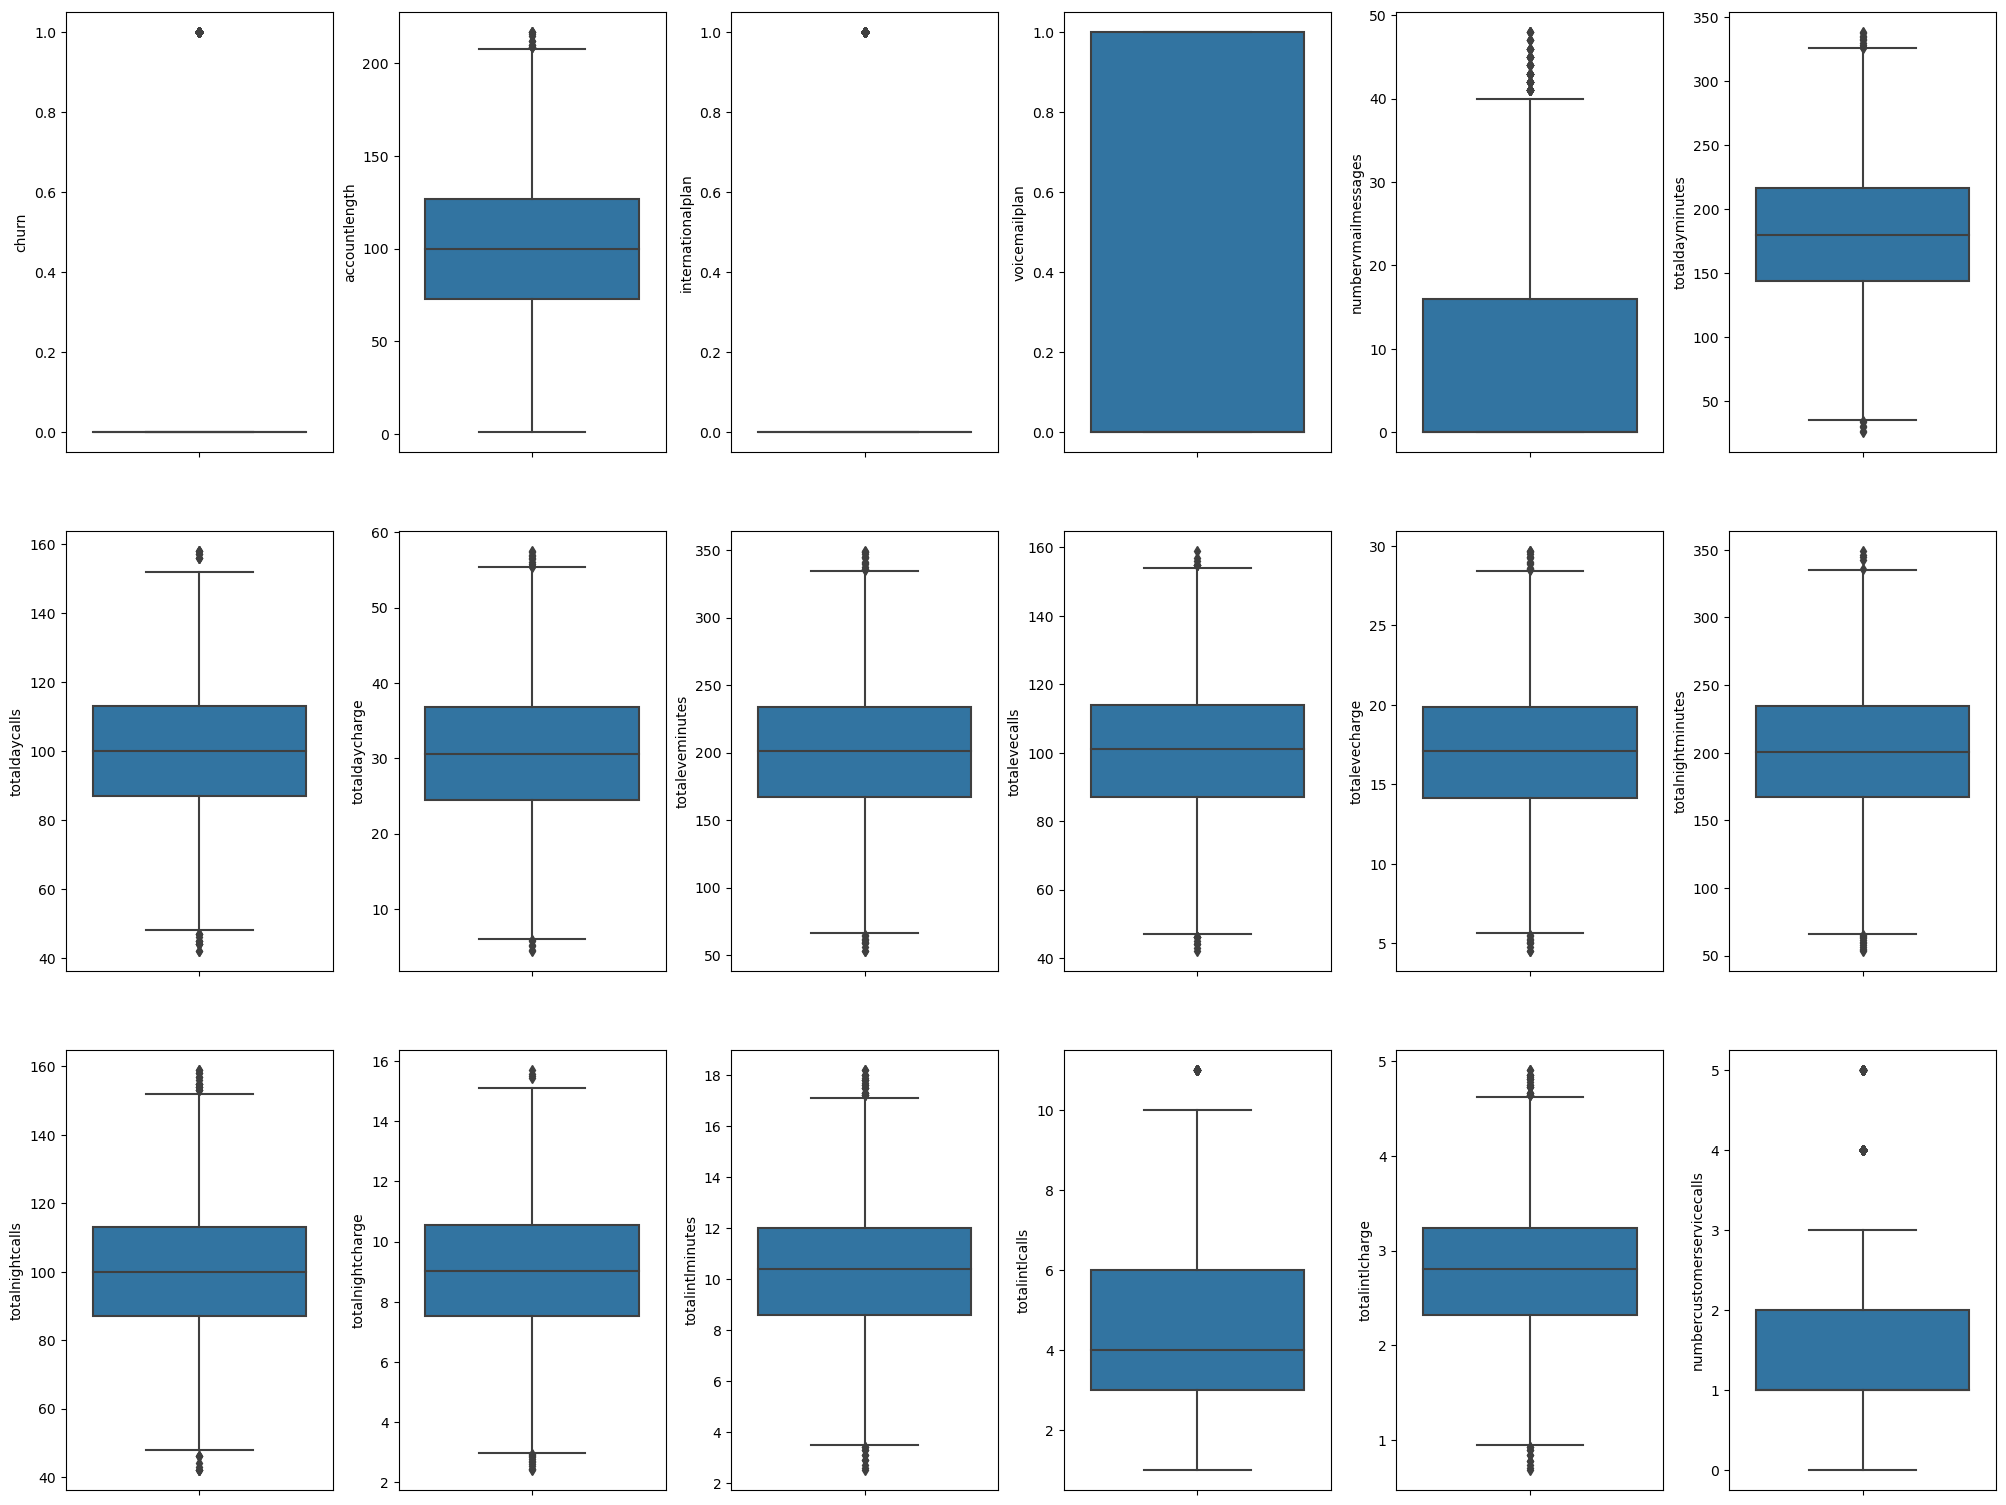

In [15]:
# create box plot
fig, ax = plt.subplots(ncols=6,nrows=3,figsize=(20,15))
index=0
ax=ax.flatten()

for i,j in df.items():
    sns.boxplot(y=i,data=df,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file="Output.html")

In [16]:
#log transformation
df["totalintlcalls"]= np.log(1+df["totalintlcalls"])

In [17]:
#log transformation
df["numbercustomerservicecalls"]= np.log(1+df["numbercustomerservicecalls"])

<AxesSubplot:>

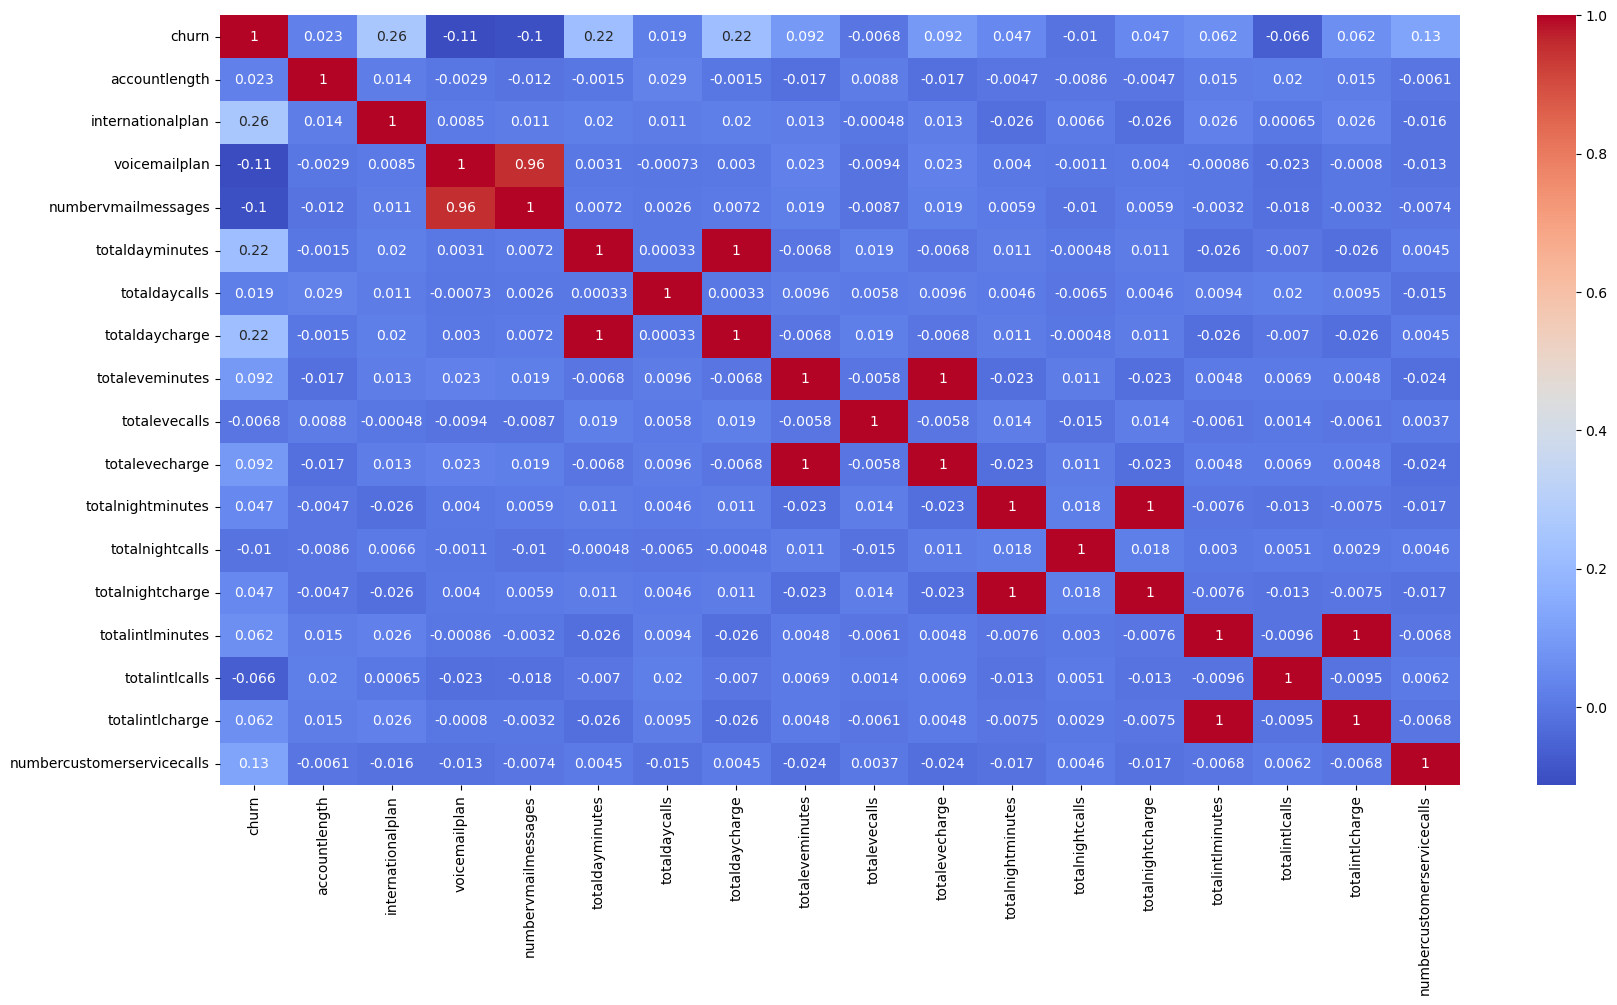

In [18]:
corr =df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [19]:
x=df.drop(columns=["voicemailplan","churn"])
y=df["churn"]

#### train test split

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=7,stratify=df["churn"])

In [22]:
y_test.value_counts()

0    1224
1     193
Name: churn, dtype: int64

In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
LG=LogisticRegression().fit(x_train,y_train)

In [24]:
def classification_logistic_evolution(x_test):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn import metrics
    th=[]
    auc=[]
    acc=[]
    pre=[]
    re=[]
    f1=[]
    for j in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        y_pred_prob=LG.predict_proba(x_test)
        y_pred_prob_one=y_pred_prob[:,1]
        for i in range(0,len(y_pred_prob_one)):
            if (y_pred_prob_one[i]>=j):
                y_pred_prob_one[i]=1
            else:
                y_pred_prob_one[i]=0
        a=metrics.roc_auc_score(y_test,y_pred_prob_one)
        ac=metrics.accuracy_score(y_test,y_pred_prob_one)
        p=metrics.precision_score(y_test,y_pred_prob_one)
        r=metrics.recall_score(y_test,y_pred_prob_one)
        f=metrics.f1_score(y_test,y_pred_prob_one)
        th.append(j)
        auc.append(a)
        acc.append(ac)
        pre.append(p)
        re.append(r)
        f1.append(f)
    
    answer=pd.DataFrame({"Threshold":th,"AUC score":auc,"Accuracy":acc,"Precision":pre,"Recall":re,"f1 score":f1})
    return answer
classification_logistic_evolution(x_test)

,Threshold,AUC score,Accuracy,Precision,Recall,f1 score
0,0.0,0.500000,0.136203,0.136203,1.000000,0.239752
1,0.1,0.680537,0.613973,0.228528,0.772021,0.352663
2,0.2,0.687731,0.796048,0.342105,0.538860,0.418511
3,0.3,0.648538,0.848977,0.436364,0.373057,0.402235
4,0.4,0.623019,0.865208,0.509091,0.290155,0.369637
5,0.5,0.589738,0.868031,0.540541,0.207254,0.299625
6,0.6,0.553867,0.870148,0.621622,0.119171,0.200000
7,0.7,0.532045,0.870148,0.764706,0.067358,0.123810
8,0.8,0.515544,0.868031,1.000000,0.031088,0.060302
9,0.9,0.502591,0.864502,1.000000,0.005181,0.010309


##### By visually watching the auc and value of recall we choose our final threshold at 0.4

In [25]:
y_pred_prob=LG.predict_proba(x_test)
y_pred_prob_one=y_pred_prob[:,1]
for i in range(0,len(y_pred_prob_one)):
    if (y_pred_prob_one[i]>=0.2):
        y_pred_prob_one[i]=1
    else:
        y_pred_prob_one[i]=0
#print("Recall :\n",metrics.recall_score(y_test,y_pred_prob_one))
print("AUC : ",metrics.roc_auc_score(y_test,y_pred_prob_one))
print("Classification report :\n",metrics.classification_report(y_test,y_pred_prob_one))

AUC :  0.6877307054082428
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      1224
           1       0.34      0.54      0.42       193

    accuracy                           0.80      1417
   macro avg       0.63      0.69      0.65      1417
weighted avg       0.84      0.80      0.81      1417



In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier().fit(x_train,y_train)
def classification_knn_evolution(x_test):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn import metrics
    th=[]
    auc=[]
    acc=[]
    pre=[]
    re=[]
    f1=[]
    for j in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        y_pred_prob=knn.predict_proba(x_test)
        y_pred_prob_one=y_pred_prob[:,1]
        for i in range(0,len(y_pred_prob_one)):
            if (y_pred_prob_one[i]>=j):
                y_pred_prob_one[i]=1
            else:
                y_pred_prob_one[i]=0
        a=metrics.roc_auc_score(y_test,y_pred_prob_one)
        ac=metrics.accuracy_score(y_test,y_pred_prob_one)
        p=metrics.precision_score(y_test,y_pred_prob_one)
        r=metrics.recall_score(y_test,y_pred_prob_one)
        f=metrics.f1_score(y_test,y_pred_prob_one)
        th.append(j)
        auc.append(a)
        acc.append(ac)
        pre.append(p)
        re.append(r)
        f1.append(f)
    
    answer=pd.DataFrame({"Threshold":th,"AUC score":auc,"Accuracy":acc,"Precision":pre,"Recall":re,"f1 score":f1})
    return answer
        
classification_knn_evolution(x_test)

In [ ]:
y_pred_prob=knn.predict_proba(x_test)
y_pred_prob_one=y_pred_prob[:,1]
for i in range(0,len(y_pred_prob_one)):
    if (y_pred_prob_one[i]>=0.4):
        y_pred_prob_one[i]=1
    else:
        y_pred_prob_one[i]=0
#print("Recall :\n",metrics.recall_score(y_test,y_pred_prob_one))
print("AUC : ",metrics.roc_auc_score(y_test,y_pred_prob_one))
print("Classification report :\n",metrics.classification_report(y_test,y_pred_prob_one))

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
GN=GaussianNB().fit(x_train,y_train)
def classification_knn_evolution(x_test):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn import metrics
    th=[]
    auc=[]
    acc=[]
    pre=[]
    re=[]
    f1=[]
    for j in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        y_pred_prob=GN.predict_proba(x_test)
        y_pred_prob_one=y_pred_prob[:,1]
        for i in range(0,len(y_pred_prob_one)):
            if (y_pred_prob_one[i]>=j):
                y_pred_prob_one[i]=1
            else:
                y_pred_prob_one[i]=0
        a=metrics.roc_auc_score(y_test,y_pred_prob_one)
        ac=metrics.accuracy_score(y_test,y_pred_prob_one)
        p=metrics.precision_score(y_test,y_pred_prob_one)
        r=metrics.recall_score(y_test,y_pred_prob_one)
        f=metrics.f1_score(y_test,y_pred_prob_one)
        th.append(j)
        auc.append(a)
        acc.append(ac)
        pre.append(p)
        re.append(r)
        f1.append(f)
    
    answer=pd.DataFrame({"Threshold":th,"AUC score":auc,"Accuracy":acc,"Precision":pre,"Recall":re,"f1 score":f1})
    return answer
        
classification_knn_evolution(x_test)

In [ ]:
y_pred_prob=GN.predict_proba(x_test)
y_pred_prob_one=y_pred_prob[:,1]
for i in range(0,len(y_pred_prob_one)):
    if (y_pred_prob_one[i]>=0.4):
        y_pred_prob_one[i]=1
    else:
        y_pred_prob_one[i]=0
#print("Recall :\n",metrics.recall_score(y_test,y_pred_prob_one))
print("AUC : ",metrics.roc_auc_score(y_test,y_pred_prob_one))
print("Classification report :\n",metrics.classification_report(y_test,y_pred_prob_one))

In [ ]:
import pickle
pickle.dump(LG,open("churn.pkl","wb"))